In [ ]:
import numpy as np

mtx = np.array([1, 2, 3, 4], ndmin=2).T
mtx

In [ ]:
mtx1 = [[1, 2], [3, 4]]
mtx2 = [[5, 6], [7, 8]]
np.dot(mtx1, mtx2)

In [ ]:
def random_weight_matrix(len1, len2):
    # 正态分布
    return np.random.normal(0.0, pow(len1, -0.5), (len1, len2))

random_weight_matrix(5, 2)

In [ ]:
import source as src

nn = src.neuralNetwork({
    'input': 3,
    'hide': 2,
    'output': 2
    
})

# print(nn.query((1, 2, 3)))

nn.train((1, 2, 3), (0.1, 0.9))

# print(nn.w_ih)
# print(nn.w_ho)



In [ ]:
import numpy as np

a = 0.3
b = np.array([[0.5], [-0.1]])
c = np.array([[0.8], [0.2]])
d = np.array([[1, 2, 3]])


0.3 * np.dot(b * c * (1 - c), d)


t1 = b * c
t2 = 1 - c

# print(b * c)
# print(1 - c)
r1 = t1 * t2
r2 = np.dot(r1, d)
r3 = 0.3 * r2
print(r3)

e = [[-0.03, -0.12, -0.43], [0.97, 0.77, -0.42]]
e += r3
e

In [ ]:
import numpy as np
import scipy.special as sp


def calc(activation_fn, weight, input):
    return activation_fn(np.dot(weight, input))


w = [
    [1, 2],
    [3, 4]
]

i = [
    [5, 6],
    [7, 8]
]


w = np.vectorize(lambda x: x/100)(w)

calc(lambda x: sp.expit(x), w, i)

In [ ]:
np.array([3, 4], ndmin=2).T - np.array([1, 2], ndmin=2).T

In [ ]:
# a = np.array([1, 2, 3], ndmin=2)
# a = 
import numpy as np

# np.transpose([[1, 2, 3]])

# np.array([[1, 2, 3]]).T

In [ ]:
# 设定目标值
targets = np.zeros(2) + 0.01
# val_arr[0] 就是此记录的目标
targets[1] = 0.99
targets

In [ ]:
import numpy as np

np.array([1, 2, 3]) / 255 * 0.99 + 0.01

np.zeros(3)

np.argmax([1, 2, 3, 4])

np.array([1, 2, 3, 4]).sum()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with open('../src/mnist_dataset/mini/mnist_test_10.csv') as file:
    val = file.readlines()

val = val[0].split(',')[1:]
print(val)


img_arr = np.asfarray(val).reshape((28, 28))
plt.imshow(img_arr, cmap='Greys', interpolation='None')

In [3]:
with open('../src/mnist_dataset/pjreddie/mnist_train.csv') as file:
    val = file.readlines()
print(f'训练数据有{len(val)}组')

with open('../src/mnist_dataset/pjreddie/mnist_test.csv') as file:
    val = file.readlines()
print(f'测试数据有{len(val)}组')

训练数据有60000组
测试数据有10000组


第2世代得分: 0.9672


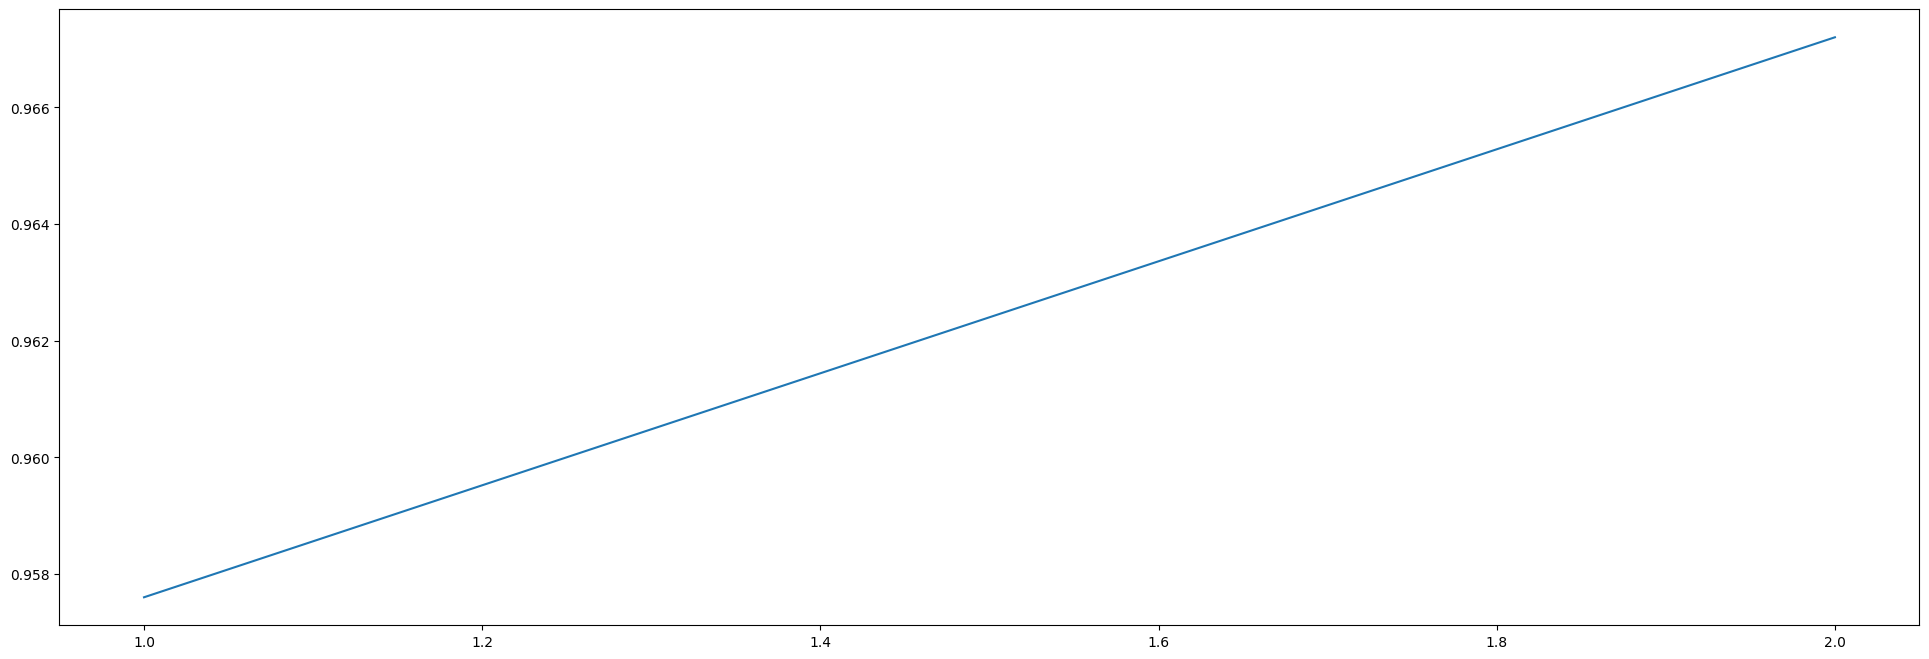

In [4]:
import source as src
import matplotlib.pyplot as plt
#  交互式环境专用，清空输出
from IPython.display import clear_output

x = []
y = []
def draw(a, b):
    clear_output()
    x.append(a)
    y.append(b)
    print(f'第{a}世代得分: {b}')
    plt.subplots(figsize=(24, 8))
    plt.plot(x, y)
    plt.show()

network_info = {
    'node_num': (784, 200, 10),
    'learning_grate': 0.1,
    'train_file': '../src/mnist_dataset/pjreddie/mnist_train.csv',
    # 'train_file': '../src/mnist_dataset/mini/mnist_train_100.csv',
    'epochs': 30, # 循环训练30次
    'rotate': False, # 是否旋转
    'rotate_info': (10, -10),
    # 最终回调
    'callback': lambda nn_class: print('得分: ', src.test(nn_class, '../src/mnist_dataset/pjreddie/mnist_test.csv')[0]),
    # 'callback': lambda nn_class: print('得分: ', src.test(nn_class, '../src/mnist_dataset/mini/mnist_test_10.csv')[0]),
    # 世代回调
    'callback_each_epoch': lambda i, c: draw(i, src.test(c, '../src/mnist_dataset/pjreddie/mnist_test.csv')[0])
}

src.train(network_info)